<a href="https://colab.research.google.com/github/NguyenHan243/ANN/blob/main/written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(112,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])


In [7]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8813 - loss: 0.3774 - val_accuracy: 0.9647 - val_loss: 0.1096
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9717 - loss: 0.0906 - val_accuracy: 0.9594 - val_loss: 0.1410
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9817 - loss: 0.0592 - val_accuracy: 0.9750 - val_loss: 0.0909
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9876 - loss: 0.0419 - val_accuracy: 0.9781 - val_loss: 0.0770
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9823 - val_loss: 0.0804
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9784 - val_loss: 0.1003
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9944 - loss: 0.0205 - val_accuracy: 0.9823 - val_loss: 0.0968
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9943 - loss: 0.0172 - 

In [ ]:
model.save('written_digits.h5')
from keras.models import load_model
model=load_model('written_digits.h5')

In [8]:
import cv2
import matplotlib.pyplot as plt
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img.astype("float32") / 255
    img = img.flatten()
    return img
def predict_digit(image_path):
    processed_img = preprocess_image(image_path)
    processed_img = processed_img.reshape(1, 784)
    prediction = model.predict(processed_img)
    predicted_digit = np.argmax(prediction)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis("off")
    plt.show()
    return predicted_digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


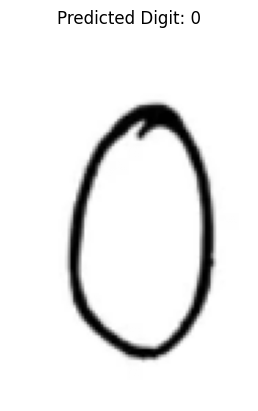

Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


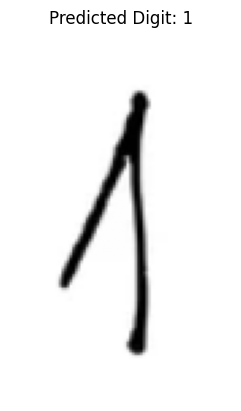

Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


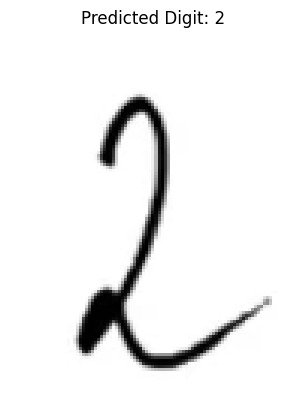

Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


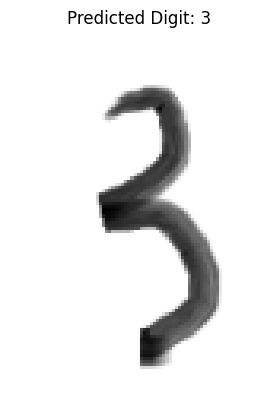

Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


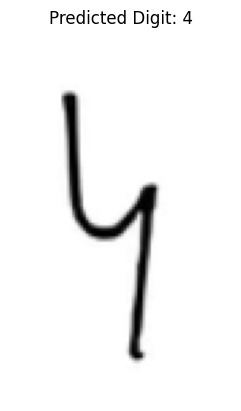

Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


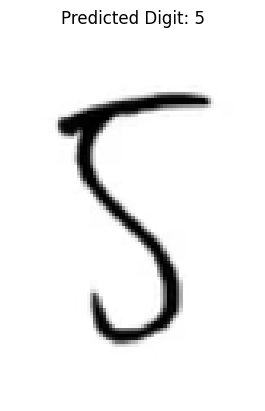

Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


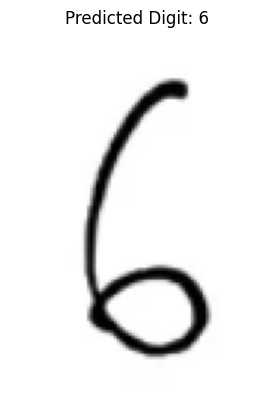

Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


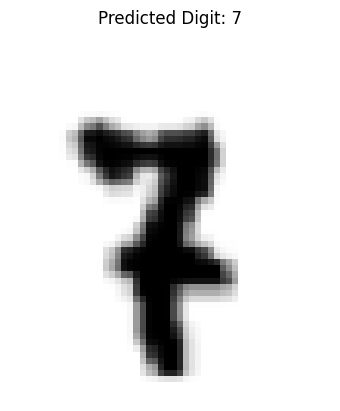

Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


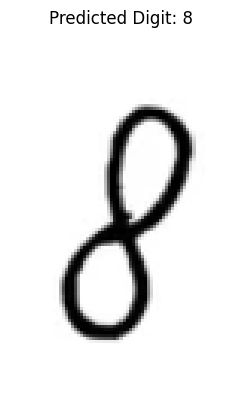

Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


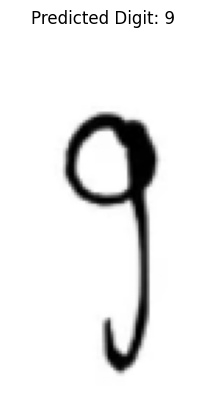

Predicted Digit: 9


In [12]:
image_path = ["/content/0.png","/content/1.png","/content/2.png","/content/3.png","/content/4.png","/content/5.png","/content/6.png","/content/7.png","/content/8.png","/content/9.png"]
for image_path in image_path:
    predicted_digit = predict_digit(image_path)
    print(f"Predicted Digit: {predicted_digit}")